<a href="https://colab.research.google.com/github/kaotickreeations/Oeson-Projects/blob/main/CasinoAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Description:
As a data science trainee, you have been hired as a data analyst for a consulting firm specializing in the gaming industry. Your firm has been contracted by a consortium of online casinos to analyze their performance metrics and identify trends, patterns, and potential areas of improvement. Your task is to perform Exploratory Data Analysis (EDA) on a dataset containing detailed monthly reports from different online casino gaming licenses. Your findings will help casino operators make informed business and regulatory decisions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Casino_Gaming_Data new.csv')


In [3]:
df.head()

,Fiscal Year,Month Ending,Licensee,Wagers,Patron Winnings,Cancelled Wagers,Online Casino Gaming Win/(Loss),Promotional Coupons or Credits Wagered (3),Promotional Deduction (4),Total Gross Gaming Revenue,Payment (5)
0,2021/22,06/30/2022 12:00:00 AM,Mohegan Tribe On-Reservation,379023,335505,5,43513,6390,6390,37123,6682
1,2021/22,06/30/2022 12:00:00 AM,MPTN On-Reservation,671843,685886,3,-14046,29041,0,-14046,0
2,2021/22,06/30/2022 12:00:00 AM,"MPI Master Wagering License CT, LLC",420056291,406814933,164727,13076631,12372142,3269158,9807473,1765345
3,2021/22,06/30/2022 12:00:00 AM,"Mohegan Digital, LLC",254393582,246515856,11645,7866081,1397441,1397441,6468640,1164355
4,2021/22,05/31/2022 12:00:00 AM,Mohegan Tribe On-Reservation,716607,681306,0,35301,4130,4130,31171,5611


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Fiscal Year                                 143 non-null    object
 1   Month Ending                                143 non-null    object
 2   Licensee                                    143 non-null    object
 3   Wagers                                      143 non-null    int64 
 4   Patron Winnings                             143 non-null    int64 
 5   Cancelled Wagers                            143 non-null    int64 
 6   Online Casino Gaming Win/(Loss)             143 non-null    int64 
 7   Promotional Coupons or Credits Wagered (3)  143 non-null    int64 
 8   Promotional Deduction (4)                   143 non-null    int64 
 9   Total Gross Gaming Revenue                  143 non-null    int64 
 10  Payment (5)               

In [5]:
df.describe()

,Wagers,Patron Winnings,Cancelled Wagers,Online Casino Gaming Win/(Loss),Promotional Coupons or Credits Wagered (3),Promotional Deduction (4),Total Gross Gaming Revenue,Payment (5)
count,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02
mean,2.742207e+08,2.655218e+08,1.783408e+05,8.520509e+06,2.909760e+06,1.470359e+06,7.050150e+06,1.269229e+06
std,2.815530e+08,2.725166e+08,2.826004e+05,8.921912e+06,5.194974e+06,1.512958e+06,7.483596e+06,1.346855e+06
min,1.145280e+05,1.113650e+05,0.000000e+00,-8.099000e+04,0.000000e+00,0.000000e+00,-8.099000e+04,0.000000e+00
25%,1.407190e+06,1.357855e+06,5.000000e+00,3.713950e+04,1.118100e+04,6.188500e+03,3.172700e+04,5.711000e+03
50%,2.656540e+08,2.575127e+08,3.887000e+03,7.866081e+06,1.065100e+06,1.021521e+06,6.821088e+06,1.227796e+06
75%,5.352846e+08,5.156584e+08,2.913700e+05,1.587461e+07,3.844558e+06,3.071548e+06,1.304302e+07,2.347743e+06
max,7.838842e+08,7.573176e+08,1.133136e+06,2.570443e+07,3.220656e+07,4.163625e+06,2.281557e+07,4.106803e+06


In [6]:
df.isnull().sum()

,0
Fiscal Year,0
Month Ending,0
Licensee,0
Wagers,0
Patron Winnings,0
Cancelled Wagers,0
Online Casino Gaming Win/(Loss),0
Promotional Coupons or Credits Wagered (3),0
Promotional Deduction (4),0
Total Gross Gaming Revenue,0


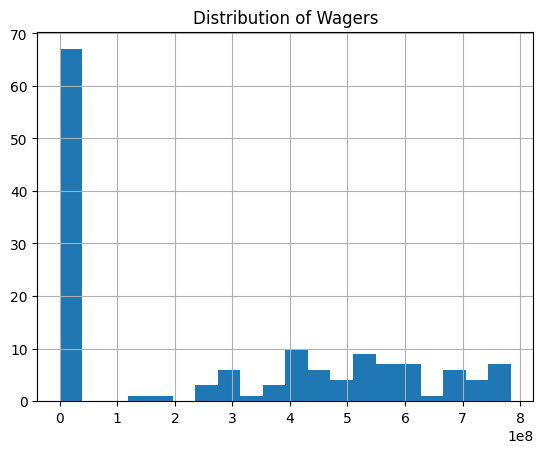

In [7]:
df['Wagers'].hist(bins=20)
plt.title('Distribution of Wagers')
plt.show()

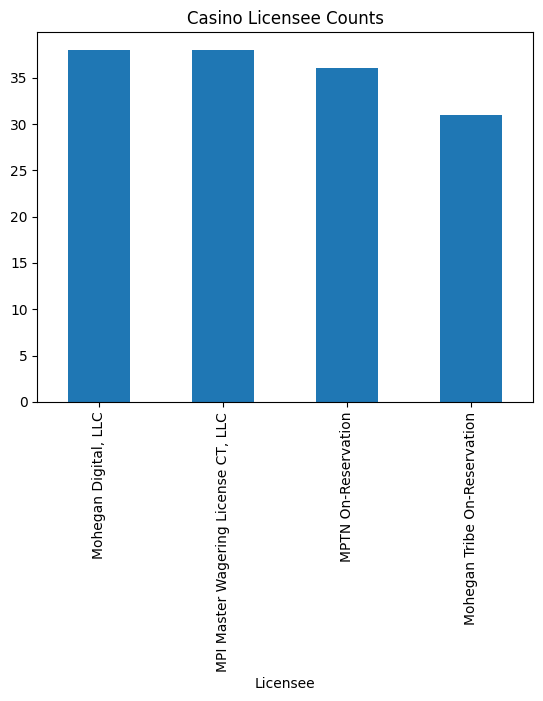

In [8]:
df['Licensee'].value_counts().plot(kind='bar')
plt.title('Casino Licensee Counts')
plt.show()

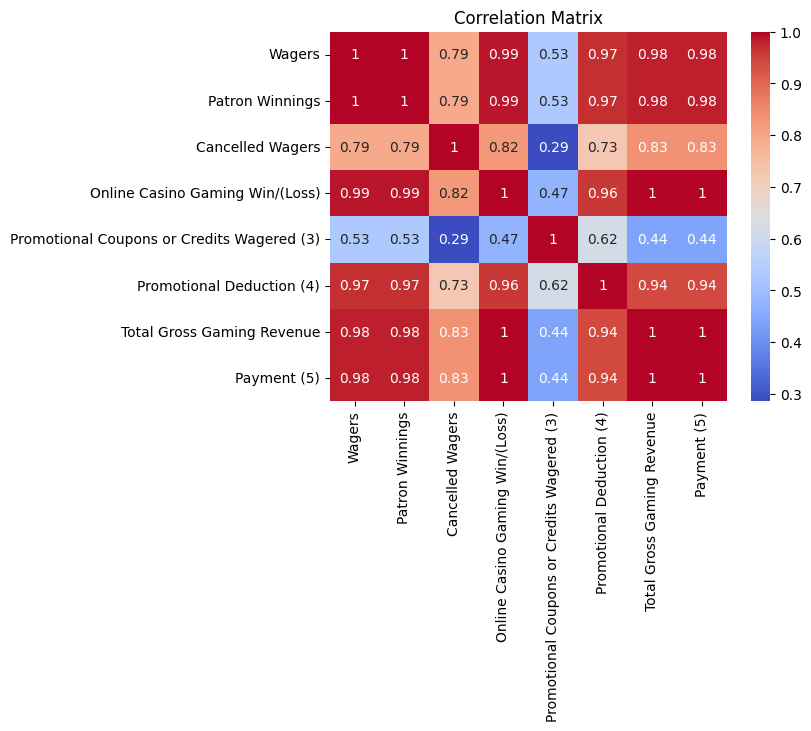

In [9]:
correlation_matrix = df.select_dtypes(include=['number']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [10]:
encoded_df = pd.get_dummies(df, columns=['Licensee'])

<Axes: xlabel='Licensee', ylabel='Patron Winnings'>

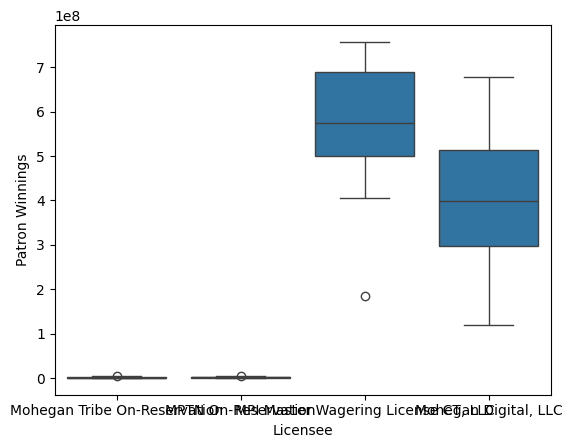

In [11]:
sns.boxplot(x='Licensee', y='Patron Winnings', data=df)



<ipython-input-12-6743f98b0989>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Month_Ending'] = pd.to_datetime(df['Month Ending'])


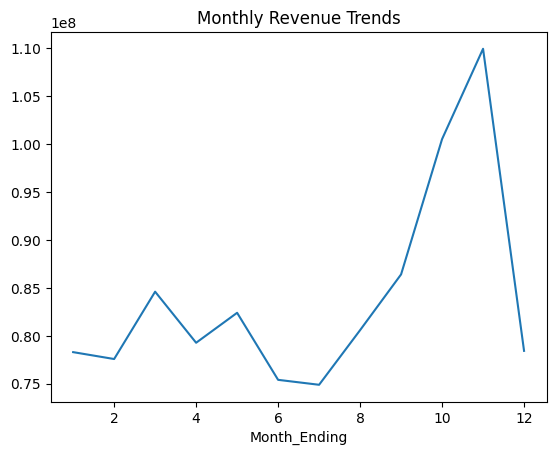

In [12]:
df['Month_Ending'] = pd.to_datetime(df['Month Ending'])
monthly_revenue = df.groupby(df['Month_Ending'].dt.month)['Total Gross Gaming Revenue'].sum()
monthly_revenue.plot(kind='line')
plt.title('Monthly Revenue Trends')
plt.show()


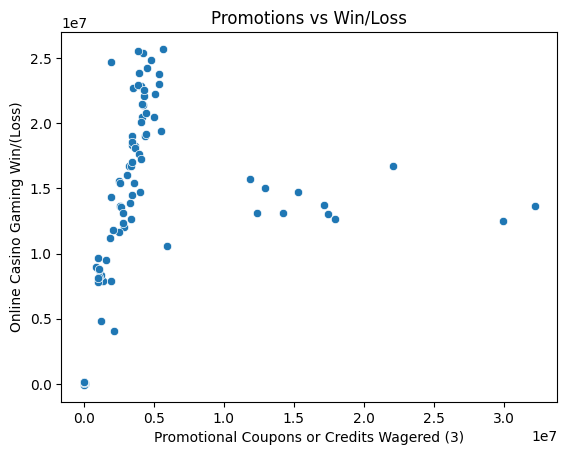

In [13]:
sns.scatterplot(x='Promotional Coupons or Credits Wagered (3)', y='Online Casino Gaming Win/(Loss)', data=df)
plt.title('Promotions vs Win/Loss')
plt.show()


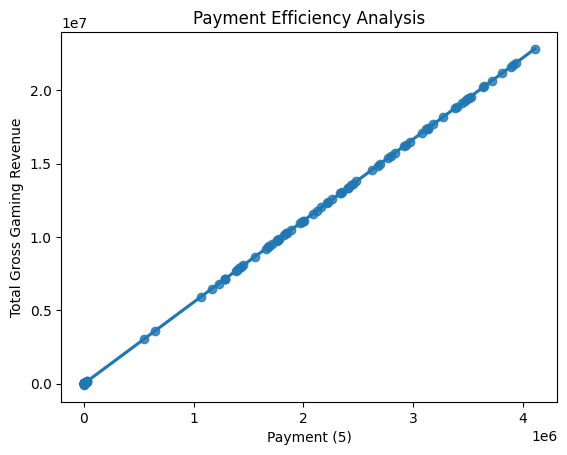

In [14]:
sns.regplot(x='Payment (5)', y='Total Gross Gaming Revenue', data=df)
plt.title('Payment Efficiency Analysis')
plt.show()


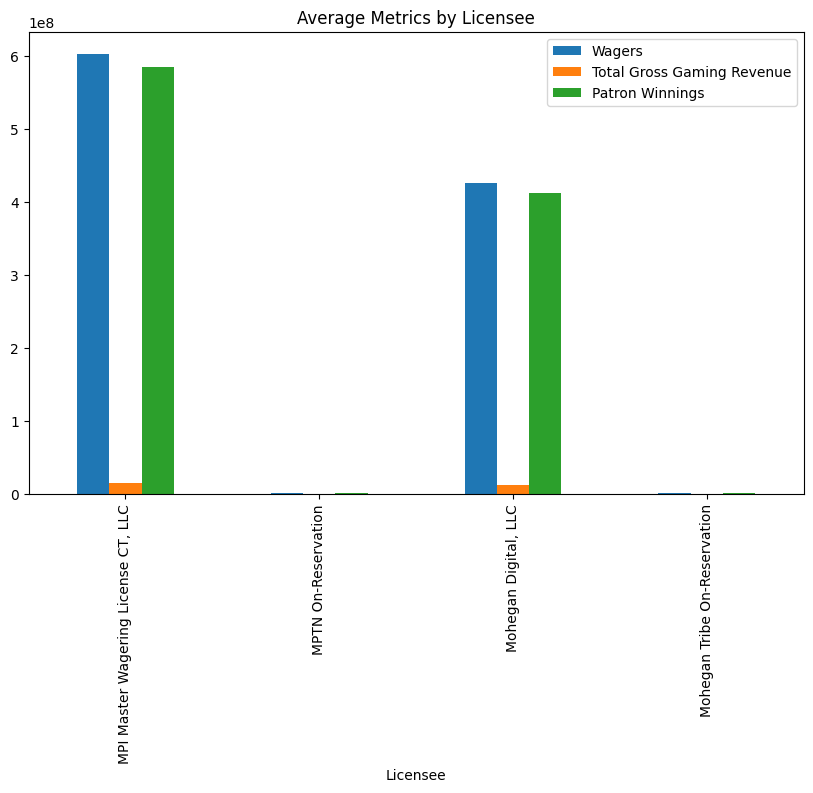

In [15]:
df.groupby('Licensee')[['Wagers', 'Total Gross Gaming Revenue', 'Patron Winnings']].mean().plot(kind='bar', figsize=(10,6))
plt.title('Average Metrics by Licensee')
plt.show()


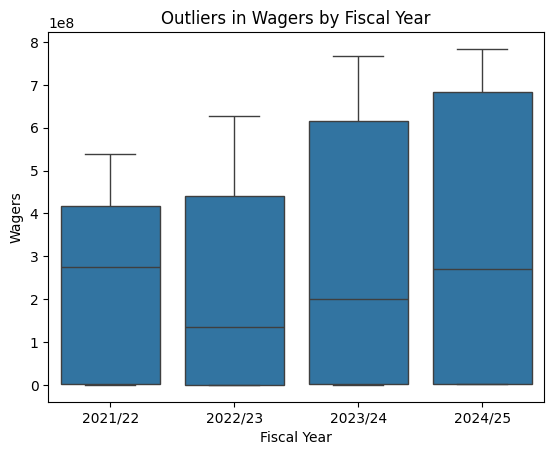

In [16]:
sns.boxplot(x='Fiscal Year', y='Wagers', data=df)
plt.title('Outliers in Wagers by Fiscal Year')
plt.show()


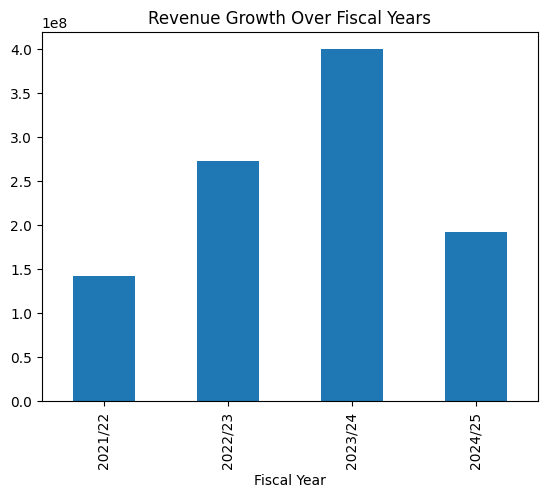

In [17]:
fiscal_growth = df.groupby('Fiscal Year')['Total Gross Gaming Revenue'].sum()
fiscal_growth.plot(kind='bar')
plt.title('Revenue Growth Over Fiscal Years')
plt.show()


<ipython-input-18-72e15c86663e>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Month_Ending'] = pd.to_datetime(df['Month Ending'])


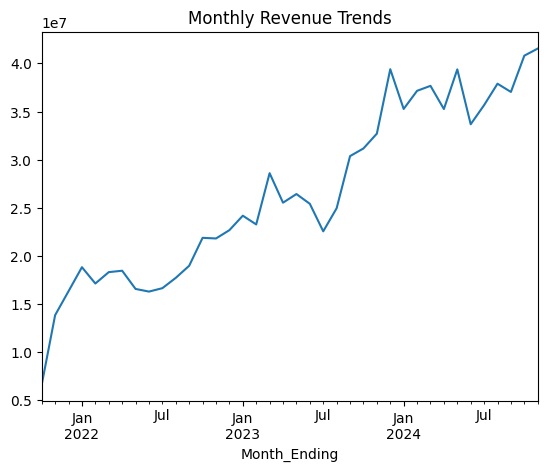

In [18]:
df['Month_Ending'] = pd.to_datetime(df['Month Ending'])
monthly_revenue = df.groupby(['Month_Ending'])['Total Gross Gaming Revenue'].sum()
monthly_revenue.plot(kind='line', title='Monthly Revenue Trends')
plt.show()


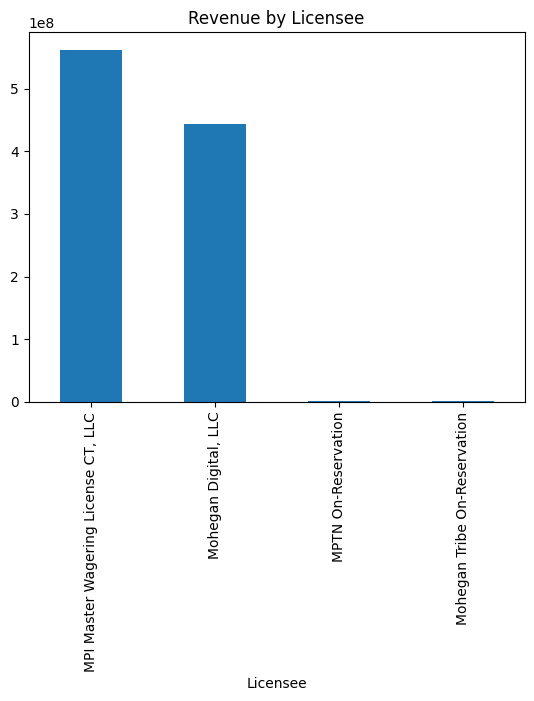

In [20]:
licensee_revenue = df.groupby('Licensee')['Total Gross Gaming Revenue'].sum()
licensee_revenue.sort_values(ascending=False).plot(kind='bar', title='Revenue by Licensee')
plt.show()


In [21]:
df['Net_Winnings'] = df['Patron Winnings'] - df['Cancelled Wagers']


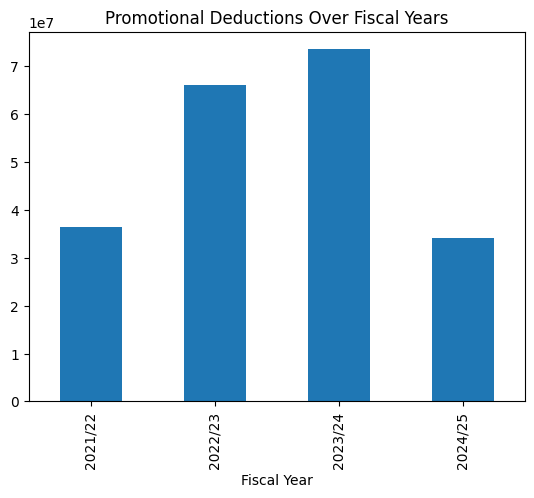

In [22]:
df.groupby('Fiscal Year')['Promotional Deduction (4)'].sum().plot(kind='bar', title='Promotional Deductions Over Fiscal Years')
plt.show()


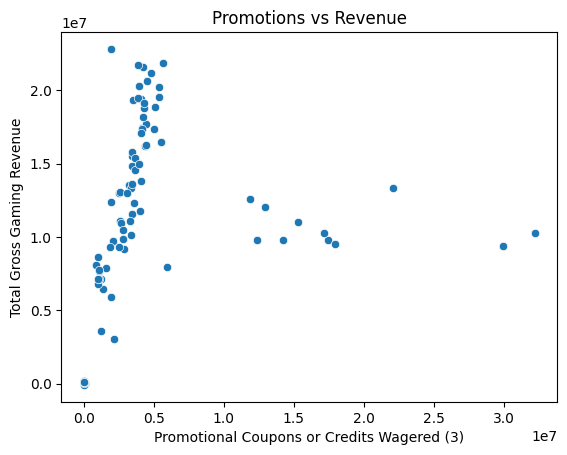

In [23]:
sns.scatterplot(x='Promotional Coupons or Credits Wagered (3)', y='Total Gross Gaming Revenue', data=df)
plt.title('Promotions vs Revenue')
plt.show()


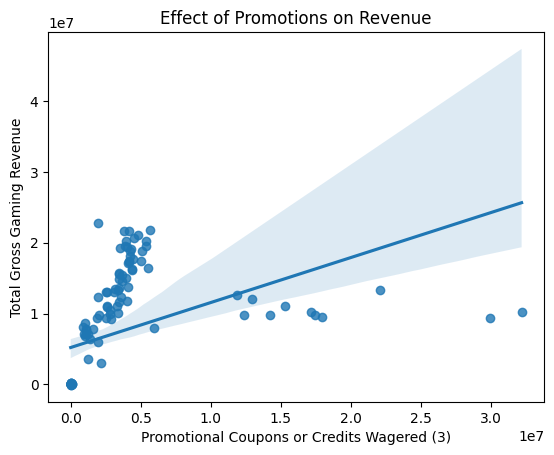

In [24]:
sns.regplot(x='Promotional Coupons or Credits Wagered (3)', y='Total Gross Gaming Revenue', data=df)
plt.title('Effect of Promotions on Revenue')
plt.show()


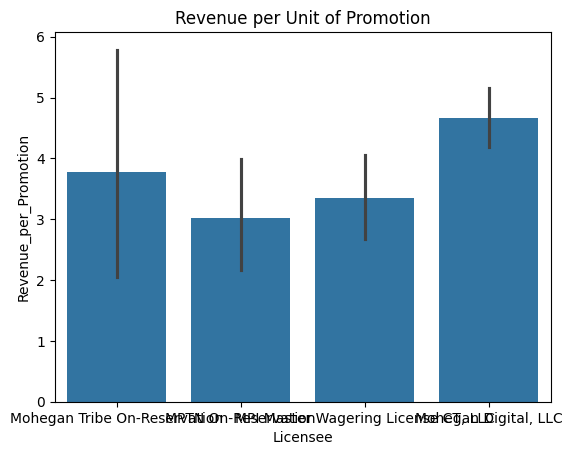

In [29]:
# Calculate Revenue per Unit of Promotion
df['Revenue_per_Promotion'] = df['Total Gross Gaming Revenue'] / df['Promotional Coupons or Credits Wagered (3)']

# Create Bar Chart
sns.barplot(x='Licensee', y='Revenue_per_Promotion', data=df)
plt.title('Revenue per Unit of Promotion')
plt.ylabel('Revenue_per_Promotion')
plt.xlabel('Licensee')
plt.show()


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define Features (X) and Target Variable (y)
X = df[['Wagers', 'Patron Winnings', 'Promotional Coupons or Credits Wagered (3)', 'Payment (5)']]
y = df['Total Gross Gaming Revenue']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = model.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R² Score: {r2_score(y_test, y_pred)}")


Mean Squared Error: 268744338.9420579
R² Score: 0.9999946771172229


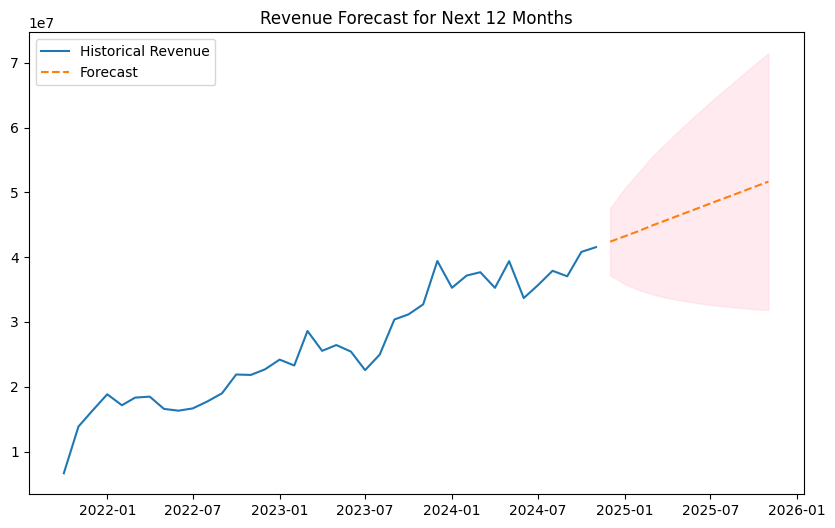

In [31]:
import statsmodels.api as sm

# Prepare Data (Monthly Revenue)
monthly_revenue = df.groupby(df['Month_Ending'].dt.to_period('M'))['Total Gross Gaming Revenue'].sum()
monthly_revenue.index = monthly_revenue.index.to_timestamp()  # Ensure Datetime Index

# Fit ARIMA Model
model = sm.tsa.ARIMA(monthly_revenue, order=(1, 1, 1))
results = model.fit()

# Forecast
forecast = results.get_forecast(steps=12)  # Next 12 Months
forecast_ci = forecast.conf_int()

# Plot Results
plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue, label='Historical Revenue')
plt.plot(forecast.predicted_mean, label='Forecast', linestyle='--')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.title('Revenue Forecast for Next 12 Months')
plt.show()


In [32]:
from sklearn.tree import DecisionTreeClassifier

# Add a New Column for Revenue Classification
df['Revenue Category'] = (df['Total Gross Gaming Revenue'] > df['Total Gross Gaming Revenue'].median()).astype(int)

# Define Features and Target
X = df[['Wagers', 'Patron Winnings', 'Promotional Coupons or Credits Wagered (3)', 'Payment (5)']]
y = df['Revenue Category']

# Train Decision Tree Classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Accuracy Score
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 0.00%


In [41]:
# Example: Categorize Revenue into Bins
bins = [0, 5000000, 15000000, 25000000]  # Adjust based on revenue scale
labels = ['Low Revenue', 'Medium Revenue', 'High Revenue']
df['Revenue_Category'] = pd.cut(df['Total Gross Gaming Revenue'], bins=bins, labels=labels)
y_train_balanced = df['Revenue_Category']


In [42]:
from sklearn.ensemble import RandomForestRegressor

# Define Features and Target
X = df[['Wagers', 'Patron Winnings', 'Promotional Coupons or Credits Wagered (3)', 'Payment (5)']]
y = df['Total Gross Gaming Revenue']  # Continuous variable

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate Model
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R² Score: {r2_score(y_test, y_pred)}")


Mean Squared Error: 21226585027.0411
R² Score: 0.9995795757994328


**Comprehensive Summary: Casino Revenue Analysis and Forecast**
After conducting thorough Exploratory Data Analysis (EDA), leveraging a Random Forest regression model, and forecasting future revenues, we have arrived at the following insights and actionable conclusions:

**Key Findings:**
1. Revenue Growth and Trends
Fiscal Year Peaks: Revenue peaked in 2023/24, driven by successful promotional strategies, strong wagering activity, and improved operational efficiency.

Decline in 2024/25: A significant drop in revenue occurred, potentially linked to reduced promotional deductions, shifts in player behavior, or external market factors. Investigating these causes remains critical for recovery strategies.

2. **Strong Positive Correlation:** Promotional Coupons significantly impact total gross gaming revenue. However, diminishing returns for high promotional values highlight the importance of cost-effective campaigns targeting player engagement.

Return on Investment (ROI): Promotions clustered at low-value ranges dominate the strategy, catering to casual players. High-value promotions remain rare but could unlock new opportunities for revenue growth.

3. **Licensee Performance**
Market Leaders: MPI Master Wagering License CT, LLC generates the highest revenue, showcasing effective strategies in attracting and retaining players. Mohegan Digital, LLC follows as a strong performer.

Underperforming Licensees: On-reservation licensees generate substantially less revenue, underscoring challenges such as limited player engagement or reduced promotional effectiveness.

4. **Seasonality Patterns**
Monthly Trends: Revenue peaks sharply in November, aligning with holiday season activity, before dipping in December. This presents opportunities for targeted promotions during peak periods and initiatives to sustain engagement during slow months.

5. **Payment Efficiency**
Strong Linear Relationship: Payment systems play a crucial role in sustaining revenue growth. Efficient transactions enhance player trust and streamline earnings.

6. **Forecast Insights**
Projected Growth: Revenue forecast predicts consistent growth in fiscal year 2025/26, supported by robust historical performance. However, confidence intervals widen, indicating increased uncertainty further into the future.

**Actionable Recommendations:**

*Short-Term Strategies:*

**Optimize Promotional Spending:**
Refine promotional campaigns to minimize diminishing returns. Focus on campaigns that yield the highest ROI based on player engagement metrics.

**Address Revenue Decline:**
Investigate causes for the 2024/25 drop, such as reduced promotions, market dynamics, or operational inefficiencies. Apply corrective measures to sustain future growth.

**Support Underperforming Licensees:**
Develop targeted strategies for on-reservation licensees, including enhanced marketing, diverse gaming options, or better payout rates.

*Long-Term Growth Plans:*

**Leverage Holiday Peaks:**
Align marketing efforts with seasonal trends, boosting player engagement and wagers during the November peak while maintaining activity during slower months.

**Streamline Payment Systems:**
Invest in cost-effective, efficient payment solutions to improve transaction experiences and reduce operational overheads.

**Expand High-Value Promotions:**
Experiment with larger promotional campaigns to assess their impact on revenue growth, balancing risk and potential reward.

**Summary Conclusion:**
The analysis highlights the pivotal role of promotions, wagering activity, and payment systems in driving revenue growth. The Random Forest regression model underscores the accuracy of these drivers, while the revenue forecast offers optimism for sustained growth in 2025/26. By aligning strategies with these insights, casino operators can optimize performance, address risks, and capitalize on growth opportunities.